# **Downloading Required Library and Files**

In [ ]:
!pip install -q dtreeviz

In [ ]:
# import python library

import pandas as pd #dataframe
import numpy as np #numerical
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

In [ ]:
# retreive data from URL
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/bungakharissa/IVC_data/main/turnover.csv', 'turnover.csv')

('turnover.csv', <http.client.HTTPMessage at 0x7fc0347fbb90>)

# **Load Data**

**1. Load csv File**

In [ ]:
# load turnover file (this file uses "," as delimiter)
# name the dataframe as 'data'
data = pd.read_csv('turnover.csv', delimiter=',')

# retrieve the first 5 records in data
data.head()

,satisfaction,evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Descriptive Statistics**

In [ ]:
# Check the descriptive statistics for each columns of data
data.describe()

,satisfaction,evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Check list of columns in data
data.columns

Index(['satisfaction', 'evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

#**Data Understanding**

###**Check duplicate, missing values, and data types**

In [ ]:
# check duplicate values and print (False means there is no duplicate value)
print(data.duplicated().any())

# check missing values and print the sum of missing values in each columns (0 means there is no missing value)
print(data.isnull().sum())

False
satisfaction            0
evaluation              0
number_project          0
average_montly_hours    0
time_spend_company      0
work_accident           0
left                    0
promotion               0
department              0
salary                  0
dtype: int64


In [ ]:
# check data types
data.dtypes

satisfaction            float64
evaluation              float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
work_accident             int64
left                      int64
promotion                 int64
department               object
salary                   object
dtype: object

In [ ]:
# calculate the turnover rate
data['left'].value_counts()/len(data)

0    0.833959
1    0.166041
Name: left, dtype: float64

###**Visualization**

In [ ]:
data.columns

Index(['satisfaction', 'evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

####**Employee proportion for each departments**

In [ ]:
# calculate total employee in each departments (using groupby function)
prop_department = data.groupby('department')['left'].count()
prop_department

department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: left, dtype: int64

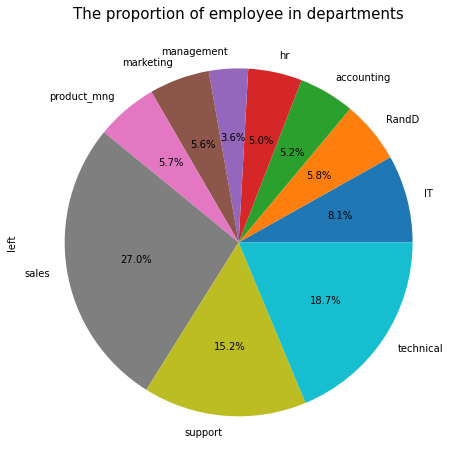

In [ ]:
# visualize the proportion of employee in each department
# set the size of figure
plt.figure(figsize=(8,8))

# add the chart title
plt.title('The proportion of employee in departments', fontdict={'fontsize': 15})

# create pie chart
prop_department.plot.pie(y='department', autopct='%1.1f%%')

# show the graph
plt.show()

####**Histograms**

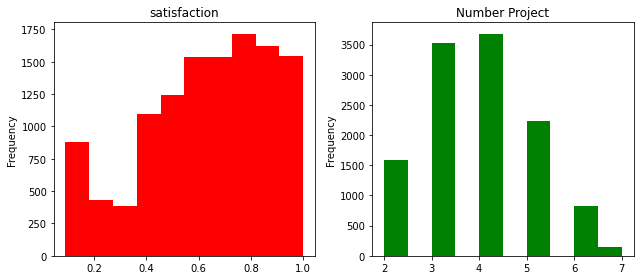

In [ ]:
# histograms

# set the size of figure
fig = plt.figure(figsize=(9,4))

# create 1x2 subplot 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a histogram for ax1
ax1.hist(data['satisfaction'], color='red')
ax1.set_title('satisfaction')
ax1.set_ylabel('Frequency')

# create a histogram for ax2
ax2.hist(data['number_project'], color='green')
ax2.set_title('Number Project')
ax2.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

####**Bar Chart: The total employee that has left the company in each departments**

In [ ]:
# calculate total employee that has left in each departments (using groupby function)
left_department = data.groupby('department')['left'].sum()
left_department

department
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left, dtype: int64

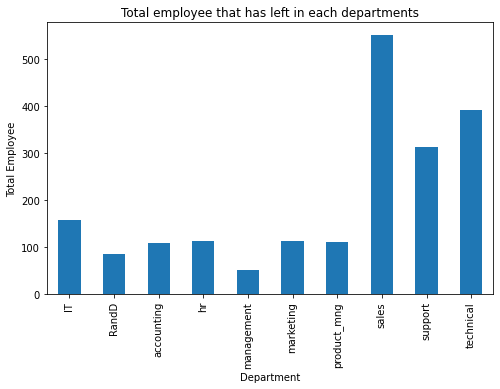

In [ ]:
# visualize using bar chart
# set the size of figure
plt.figure(figsize=(8,5))

# create bar chart
left_department.plot(kind='bar')
plt.title('Total employee that has left in each departments')
plt.ylabel('Total Employee')
plt.xlabel('Department')

# show the graph
plt.show()

####**Crosstab Bar Chart: Turnover frequency in each department**

In [ ]:
# create crosstab table: department and left columns
crosstab_dpt = pd.crosstab(data['department'], data['left'])
crosstab_dpt

left,0,1
department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


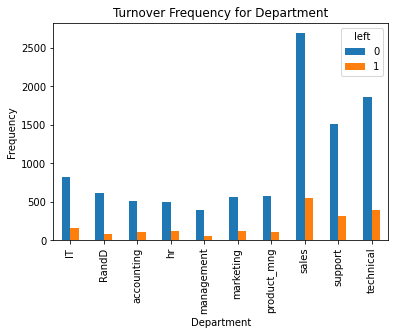

In [ ]:
# crosstabs visualization using bar chart

crosstab_dpt.plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency')

plt.show()

####**Heatmap: Correlation**

In [ ]:
data.columns

Index(['satisfaction', 'evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

In [ ]:
# specify columns to be checked
interested_columns = ['satisfaction', 'evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion']
corr_dat = data[interested_columns].corr()
corr_dat

,satisfaction,evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion
satisfaction,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


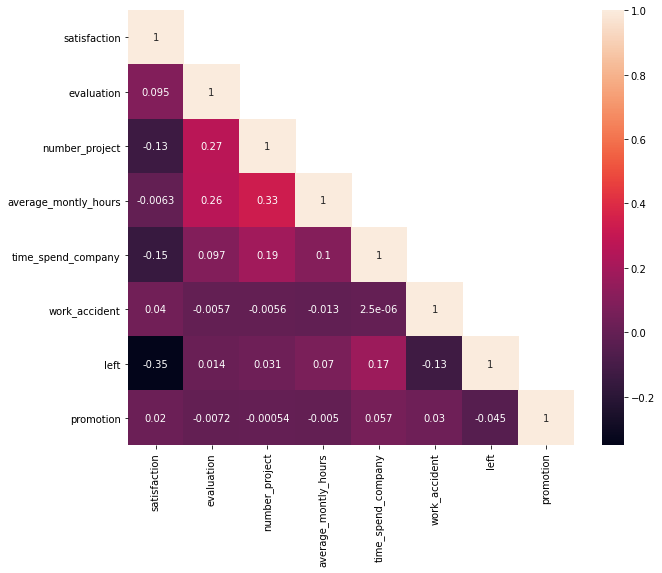

In [ ]:
# visualize the correlation
mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False
 
plt.figure(figsize=(10,8))

# visualize using heatmap
sns.heatmap(corr_dat, mask=mask, annot=True)

plt.show()

###**Practice1: Visualization**

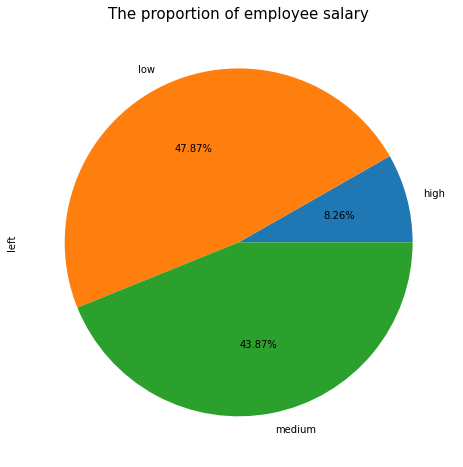

In [ ]:
# Practice: visualize the proportion of employee salary using pie chart
prop_salary = data.groupby('salary')['left'].count()
data['salary'] = data['salary'].astype('category')

# set the size of figure
plt.figure(figsize=(8,8))

# create pie chart
plt.title('The proportion of employee salary', fontdict={'fontsize': 15})
prop_salary.plot.pie(y='salary', autopct='%1.2f%%')

# show the graph
plt.show()

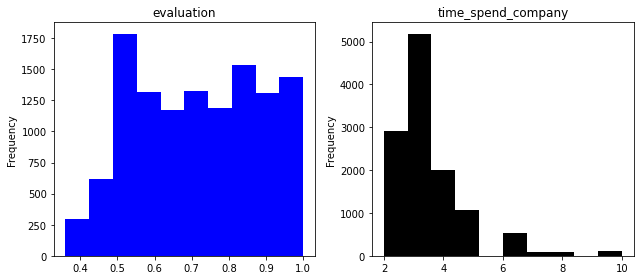

In [ ]:
# Practice: histograms

# set the size of figure
fig = plt.figure(figsize=(9,4))

# create 1x2 subplot 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a histogram for 'evaluation' (ax1) with color='blue'
ax1.hist(data['evaluation'], color='blue')
ax1.set_title('evaluation')
ax1.set_ylabel('Frequency')

# create a histogram for 'time_spend_company' (ax2) with color='black' 
ax2.hist(data['time_spend_company'], color='black')
ax2.set_title('time_spend_company')
ax2.set_ylabel('Frequency')


fig.tight_layout()
plt.show()

left       0     1
salary            
high     942    48
low     4566  1174
medium  4492   769


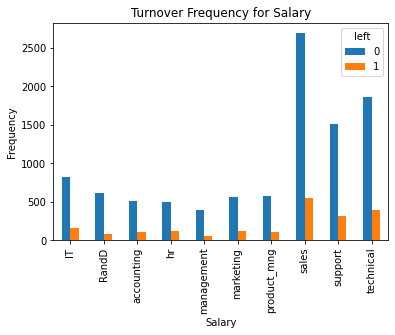

In [ ]:
# Practice for Turnover Frequency for Salary level using crosstab bar chart

# create crosstab table: salary and left columns
crosstab_sal = pd.crosstab(data['salary'], data['left'])
print(crosstab_sal)

# crosstabs visualization using bar chart
crosstab_dpt.plot(kind='bar')
plt.title('Turnover Frequency for Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

#**Data Preparation**

###**Data Transformation**

####**Transforming categorical variables**

In [ ]:
# change 'salary' to be an ordinal category
data['salary'] = data['salary'].astype('category')

# sort the category 'low-medium-high'
data['salary'] = data['salary'].cat.reorder_categories(['low','medium','high'])

# make a code for each category (0: low, 1:medium, 2:high)
data['salary'] = data['salary'].cat.codes

# short syntax
# data['salary'] = data['salary'].astype('category').cat.reorder_categories(['low','medium','high']).cat.codes

data.head()

,satisfaction,evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


####**Create dummy variables**

In [ ]:
# make dummy variable for 'department'
data = pd.get_dummies(data, columns=['department'])
data.head()

,satisfaction,evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


###**Splitting Train and Validation**

In [ ]:
# split data to be a training set and validation set
from sklearn.model_selection import train_test_split 

# set dataframe of predictor variable (all variable except left)
X = data.drop(['left'], axis=1)

# set dataframe of target variable (in this case, we use 'left')
y = data['left']

# split dataset to be a training set and validation set with test size 25%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_val))

8993
2998


#**Modeling**

###**Decision Tree**

In [ ]:
# import classification tree model
from sklearn.tree import DecisionTreeClassifier

# import library for illustrating decision tree
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
data.columns

Index(['satisfaction', 'evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

In [ ]:
# create decision tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#visualize decision tree with dtreeviz
viz = dtreeviz(dt,
               X_train.values,
               y_train.values,
               target_name='Employee Leave',
               feature_names=X_train.columns
               )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


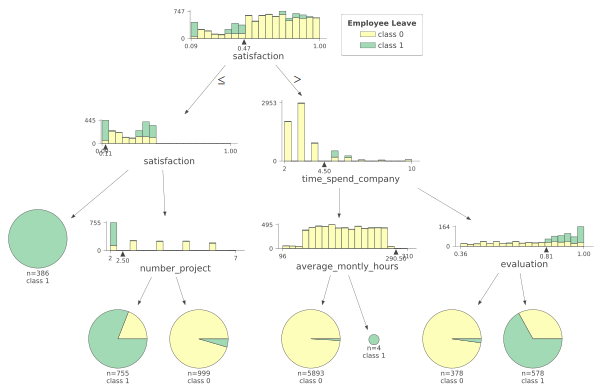

In [ ]:
#show the decision tree
viz

In [ ]:
feature_importance = dt.feature_importances_
ind = list(X)

importance = pd.DataFrame(index=ind, data=feature_importance, columns=['importance'])
importance_sorted = importance.sort_values(by='importance', ascending=False)
importance_sorted

,importance
satisfaction,0.459838
number_project,0.279655
time_spend_company,0.149149
evaluation,0.106986
average_montly_hours,0.004371
department_hr,0.000000
department_support,0.000000
department_sales,0.000000
department_product_mng,0.000000
department_marketing,0.000000


#**Model Evaluation**

###**Model Accuracy and Confusion Matrix**

In [ ]:
# check train model accuracy
dt.score(X_train, y_train)*100

95.09618592238408

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# create y_predict from predictors in validation set
y_pred = dt.predict(X_val)

# print confusion matrix
confusion_matrix(y_val, y_pred)

array([[2401,  100],
       [  43,  454]])

In [ ]:
# recall_score
from sklearn.metrics import recall_score

recall_score(y_val, y_pred)

0.9134808853118712

#**Practice 2: Splitting, Modeling, and Evaluation**

###**Splitting Training and Validation dataset**

In [ ]:
# split dataset to be a training set and validation set with test size 30%
X2_train, X2_val, y2_train, y2_val = train_test_split(X, y, test_size=0.30, random_state=42)

###**Create a Decision Tree**

In [ ]:
# create decision tree model with max_depth=4
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#visualize decision tree with dtreeviz
viz2 = dtreeviz(dt2,
               X2_train.values,
               y2_train.values,
               target_name='Employee Leave',
               feature_names=X2_train.columns
               )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


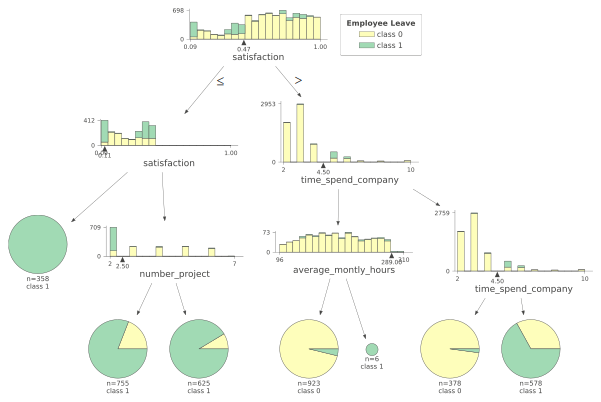

In [ ]:
#show the decision tree
viz

###**Evaluate the model**

In [ ]:
# check train model accuracy
dt2.score(X2_train, y2_train)*100

97.33110925771477

In [ ]:
# confusion matrix

# create y_predict from predictors in validation set
y2_pred = dt2.predict(X2_val)

# print confusion matrix
confusion_matrix(y2_val, y2_pred)

array([[2934,   61],
       [  55,  548]])

In [ ]:
# recall_score

recall_score(y2_val, y2_pred)

0.9087893864013267